In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("Dark2", n_colors=8)

In [23]:
rawdf = pd.read_csv('data/Students_Grading_Dataset.csv')
rawdf.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [24]:
# Department DF's
df = rawdf.drop(columns=['Student_ID','First_Name','Last_Name','Email'])
engi_df = df[df['Department'] == 'Engineering']
math_df = df[df['Department'] == 'Mathematics']
biz_df = df[df['Department'] == 'Business']
cs_df = df[df['Department'] == 'CS']

grade_mapping = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'F': 1}
df['grade_int'] = df['Grade'].map(grade_mapping)

df.sample(10)

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,grade_int
4370,Female,20,CS,54.28,93.01,88.64,64.87,90.49,2.85,83.47,73.90,F,17.8,No,Yes,NaN,Medium,1,6.1,1
1264,Male,20,CS,NaN,87.78,71.73,53.64,51.54,8.80,55.59,78.84,C,9.9,Yes,Yes,PhD,High,8,6.4,3
3288,Male,19,CS,99.96,58.34,92.82,NaN,83.35,2.76,73.85,80.09,B,27.2,No,Yes,Master's,Low,2,7.9,4
2466,Female,22,Engineering,77.53,62.32,58.79,90.30,70.98,9.52,69.41,50.06,F,10.1,Yes,Yes,Master's,Medium,1,4.5,1
4720,Male,23,CS,86.77,84.06,87.55,78.62,60.41,9.10,64.00,81.85,A,22.4,No,Yes,NaN,Low,6,5.2,5
982,Male,19,Business,75.73,63.46,95.19,95.16,85.39,2.21,60.29,75.24,B,6.8,Yes,Yes,Master's,Low,6,7.7,4
4438,Male,18,Engineering,60.81,88.92,96.61,62.66,60.87,3.12,74.54,74.22,A,25.9,No,Yes,NaN,High,7,7.5,5
1890,Female,24,Engineering,62.39,97.09,73.90,65.25,95.38,8.24,70.77,76.66,D,25.7,No,Yes,Master's,Low,2,7.9,2
4536,Male,19,CS,68.85,88.99,97.33,70.38,79.57,8.88,66.35,87.88,B,6.6,No,No,NaN,Low,9,7.6,4
888,Male,24,CS,71.35,66.54,99.72,82.61,63.03,6.10,66.53,87.50,A,23.3,No,Yes,NaN,High,1,4.9,5


In [25]:
def customize_graph(ax, plot_type='bar'):
    # Get the figure object associated with the Axes
    fig = ax.get_figure()
    # Set the figure background color
    fig.patch.set_facecolor('#1F1F1F') 
    # Set the Axes background color
    ax.set_facecolor('#1F1F1F')

    # Change the color of the x-axis label, y-axis label, and title to white
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.title.set_color('white')
    # Change the color of the x-axis and y-axis ticks to white
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    # Change the color of the axes spines to white
    for spine in ax.spines.values():
        spine.set_color('white')

    # Customizations for bar plots
    if plot_type == 'bar':
        # Get the heights of all bars in the bar plot
        bar_heights = [bar.get_height() for bar in ax.patches]
        if bar_heights:
            # Determine the maximum and minimum heights of the bars
            max_height = max(bar_heights)
            min_height = min(bar_heights)
            # Set the y-axis limits to include a 10% margin above and below the bar heights
            ax.set_ylim(min_height * 0.90, max_height * 1.10)
        # Get the current y-axis limits
        y_min, y_max = ax.get_ylim()
        # Calculate the range of y-axis values
        y_range = y_max - y_min

        # Add a text label above each bar indicating its height
        for bar in ax.patches:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval + y_range * 0.02, round(yval, 2), 
                    ha='center', va='bottom', color='white', fontweight='bold')

    # Customizations for horizontal bar plots
    elif plot_type == 'barh':
        # Get the widths of all bars in the bar plot
        bar_widths = [bar.get_width() for bar in ax.patches]
        if bar_widths:
            # Determine the maximum and minimum widths of the bars
            max_width = max(bar_widths)
            min_width = min(bar_widths)
            # Set the x-axis limits to include a 10% margin to the left and right of the bar widths
            ax.set_xlim(min_width * 0.90, max_width * 1.10)
        # Get the current x-axis limits
        x_min, x_max = ax.get_xlim()
        # Calculate the range of x-axis values
        x_range = x_max - x_min

        # Add a text label to the right of each bar indicating its width
        for bar in ax.patches:
            xval = bar.get_width()
            ax.text(xval + x_range * 0.02, bar.get_y() + bar.get_height() / 2, round(xval, 2), 
                    ha='left', va='center', color='white', fontweight='bold')


In [26]:
def customize_graph_percentage(ax, plot_type='bar'):
    # Set background colors for the figure and axes
    fig = ax.get_figure()
    fig.patch.set_facecolor('#1F1F1F') 
    ax.set_facecolor('#1F1F1F') 

    # Change color of all elements to white
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.title.set_color('white')

    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    for spine in ax.spines.values():
        spine.set_color('white')

    # Get the heights of the bars and set the y-axis limits accordingly
    if plot_type == 'bar' or plot_type == 'barh':
        bar_heights = [bar.get_height() for bar in ax.patches]
        if bar_heights:
            max_height = max(bar_heights)
            min_height = min(bar_heights)
            ax.set_ylim(min_height * 0.90, max_height * 1.10)

        y_min, y_max = ax.get_ylim()
        y_range = y_max - y_min

    # Calculate total count of grades
    total_counts = sum([p.get_height() for p in ax.patches])

    # Add bar values for bar and barh as percentage
    if plot_type == 'bar':
        for bar in ax.patches:
            yval = bar.get_height()
            percentage = (yval / total_counts) * 100
            # Add text above each bar showing its height as a percentage of the total count
            ax.text(bar.get_x() + bar.get_width() / 2, yval + y_range * 0.02, f'{round(percentage, 2)}%', ha='center', va='bottom', color='white', fontweight='bold')
    elif plot_type == 'barh':
        for bar in ax.patches:
            xval = bar.get_width()
            # Add text inside each horizontal bar showing its width
            ax.text(xval / 2, bar.get_y() + bar.get_height() / 2, round(xval, 2), ha='center', va='center', color='white', fontweight='bold')


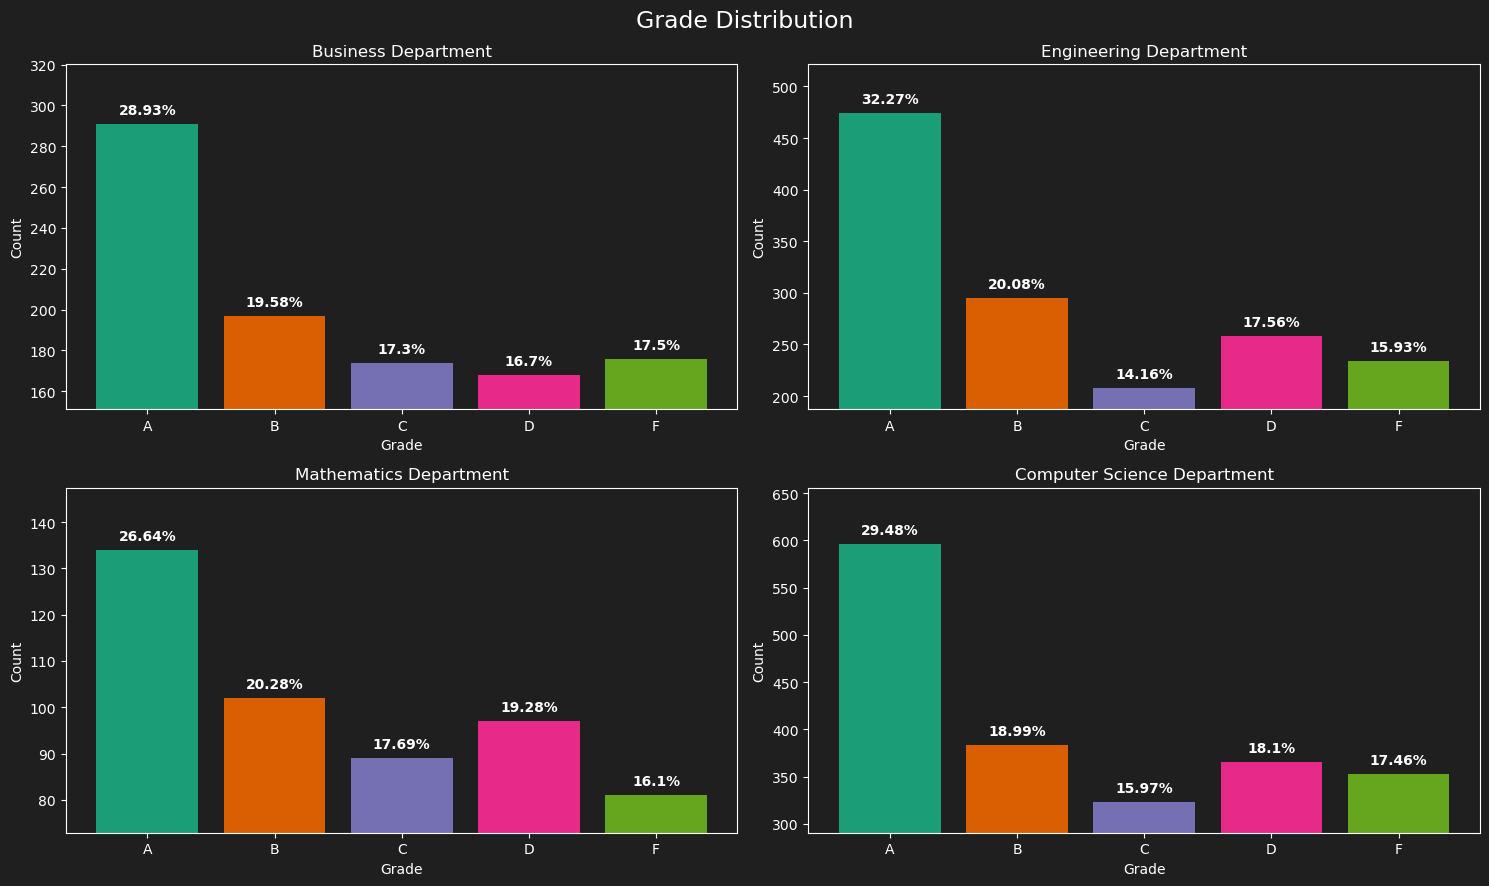

In [27]:
#counts letter grades and fills emtpy fields with 0
biz_counts = biz_df['Grade'].value_counts().reindex(['A', 'B', 'C', 'D', 'F'], fill_value=0)
engi_counts = engi_df['Grade'].value_counts().reindex(['A', 'B', 'C', 'D', 'F'], fill_value=0)
math_counts = math_df['Grade'].value_counts().reindex(['A', 'B', 'C', 'D', 'F'], fill_value=0)
cs_counts = cs_df['Grade'].value_counts().reindex(['A', 'B', 'C', 'D', 'F'], fill_value=0)


fig, axs = plt.subplots(2, 2, figsize=(15, 9))

# Business Department
axs[0, 0].bar(biz_counts.index, biz_counts.values, color=palette)
axs[0, 0].set_title('Business Department')
axs[0, 0].set_xlabel('Grade')
axs[0, 0].set_ylabel('Count')
customize_graph_percentage(axs[0, 0], plot_type='bar')

# Engineering Department
axs[0, 1].bar(engi_counts.index, engi_counts.values, color=palette)
axs[0, 1].set_title('Engineering Department')
axs[0, 1].set_xlabel('Grade')
axs[0, 1].set_ylabel('Count')
customize_graph_percentage(axs[0, 1], plot_type='bar')

# Mathematics Department
axs[1, 0].bar(math_counts.index, math_counts.values, color=palette)
axs[1, 0].set_title('Mathematics Department')
axs[1, 0].set_xlabel('Grade')
axs[1, 0].set_ylabel('Count')
customize_graph_percentage(axs[1, 0], plot_type='bar')

# Computer Science Department
axs[1, 1].bar(cs_counts.index, cs_counts.values, color=palette)
axs[1, 1].set_title('Computer Science Department')
axs[1, 1].set_xlabel('Grade')
axs[1, 1].set_ylabel('Count')
customize_graph_percentage(axs[1, 1], plot_type='bar')

plt.suptitle('Grade Distribution', color='white', fontsize=17)
plt.tight_layout()
plt.show()

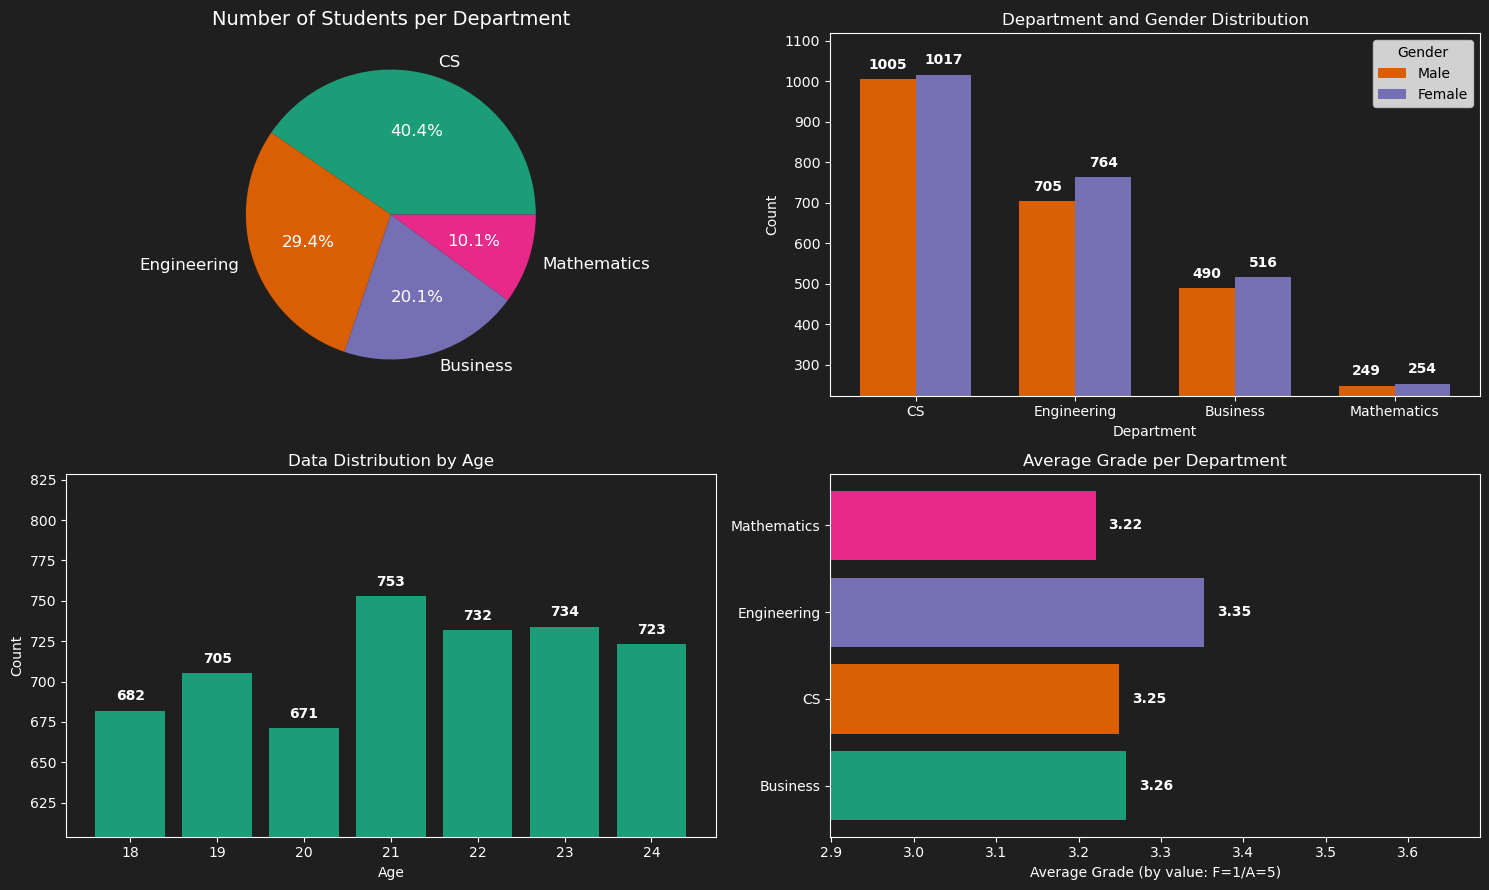

In [28]:
# Calculate the number of students in each department
student_counts = df['Department'].value_counts()

# Set up the figure and axes for multiple subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 9))

# Plotting a pie chart for the number of students per department
axs[0, 0].pie(student_counts, labels=student_counts.index, autopct='%1.1f%%', 
              colors=palette, textprops={'color': 'white', 'fontsize': 12})
axs[0, 0].set_title('Number of Students per Department', fontsize=14)
customize_graph(axs[0, 0], plot_type='pie')  # Customize the appearance of the pie chart

# Calculate the distribution of departments by gender
demodf = df.groupby('Gender')['Department'].value_counts().reset_index()
depcount = demodf['Department'].unique()
femarray = demodf[demodf['Gender'] == 'Male']['count']
malearray = demodf[demodf['Gender'] == 'Female']['count']

# Plotting a grouped bar chart for department and gender distribution
bar_width = 0.35
index = range(len(depcount))
axs[0, 1].bar([i - bar_width/2 for i in index], malearray, bar_width, label='Male', color=palette[1])
axs[0, 1].bar([i + bar_width/2 for i in index], femarray, bar_width, label='Female', color=palette[2])
axs[0, 1].set_xticks(index)
axs[0, 1].set_xticklabels(depcount)
axs[0, 1].set_title('Department and Gender Distribution')
axs[0, 1].set_xlabel('Department')
axs[0, 1].set_ylabel('Count')
axs[0, 1].legend(title='Gender')
customize_graph(axs[0, 1], plot_type='bar')  # Customize the appearance of the bar chart

# Calculate the distribution of ages
age_counts = df['Age'].value_counts().reindex([18, 19, 20, 21, 22, 23, 24])

# Plotting a bar chart for data distribution by age
axs[1, 0].bar(age_counts.index, age_counts.values, color=palette[0])
axs[1, 0].set_xticks(age_counts.index)
axs[1, 0].set_title('Data Distribution by Age')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Count')
customize_graph(axs[1, 0], plot_type='bar')  # Customize the appearance of the bar chart

# Calculate the average grade per department
average_scores = df.groupby('Department')['grade_int'].mean().reset_index()

# Plotting a horizontal bar chart for average grade per department
axs[1, 1].barh(average_scores['Department'], average_scores['grade_int'], color=palette)
axs[1, 1].set_xlabel('Average Grade (by value: F=1/A=5)')
axs[1, 1].set_title('Average Grade per Department')
customize_graph(axs[1, 1], plot_type='barh')  # Customize the appearance of the horizontal bar chart

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


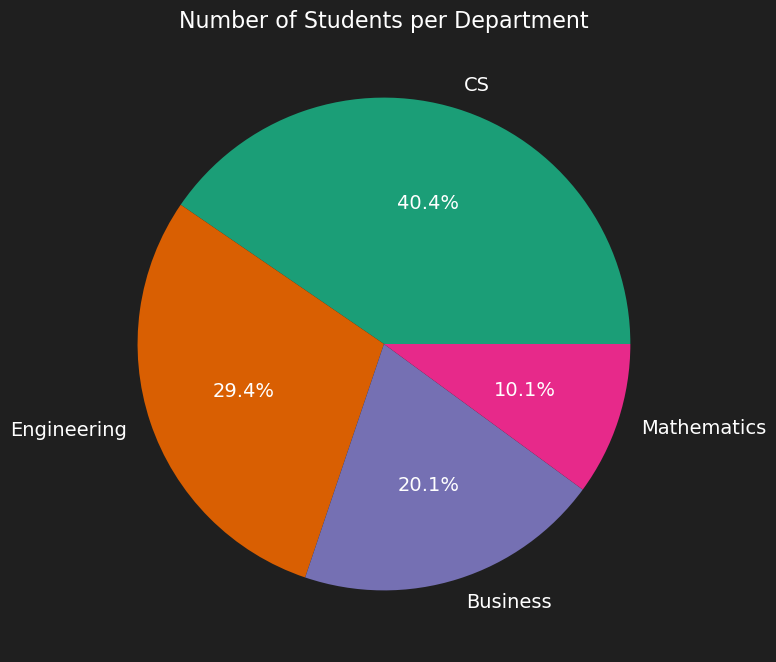

In [29]:
# Calculating department percentage
student_counts = df['Department'].value_counts()

# Plotting pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(student_counts, labels=student_counts.index, autopct='%1.1f%%', colors=palette, textprops={'color': 'white', 'fontsize': 14})
ax.set_title('Number of Students per Department', fontsize=16)
customize_graph(ax, plot_type='pie')

plt.show()


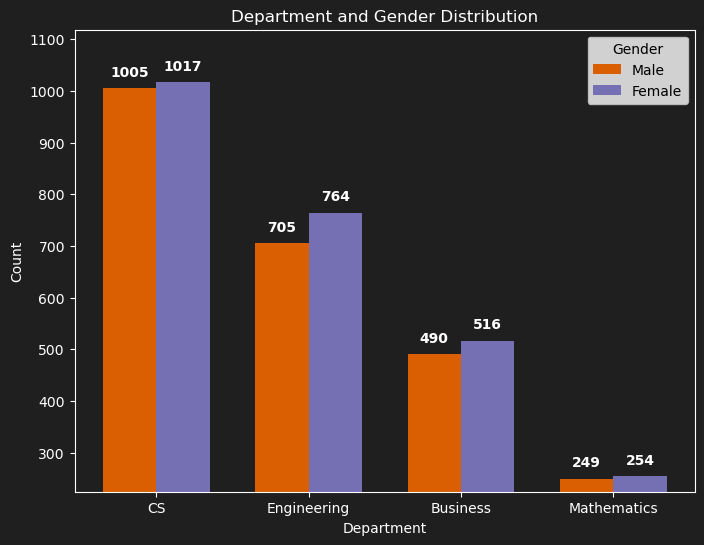

In [30]:
# Group data by 'Gender' and count occurrences in each 'Department'
demodf = df.groupby('Gender')['Department'].value_counts().reset_index()

# Get unique department names
depcount = demodf['Department'].unique()

# Extract counts of females and males in each department
femarray = demodf[demodf['Gender']=='Male']['count']
malearray = demodf[demodf['Gender']=='Female']['count']

# Create a figure and a single set of axes
fig, ax = plt.subplots(figsize=(8, 6))

# Set the bar width and index range for bar placement
bar_width = 0.35
index = range(len(depcount))

# Plot bar chart for males and females, with different colors and positions
bar1 = ax.bar([i - bar_width/2 for i in index], malearray, bar_width, label='Male', color=palette[1])
bar2 = ax.bar([i + bar_width/2 for i in index], femarray, bar_width, label='Female', color=palette[2])

# Set x-axis ticks and labels to department names
ax.set_xticks(index)
ax.set_xticklabels(depcount)
# Set title and labels for the axes
ax.set_title('Department and Gender Distribution')
ax.set_xlabel('Department')
ax.set_ylabel('Count')

# Add a legend to indicate which bars represent males and females
ax.legend(title='Gender')

# Customize the appearance of the graph
customize_graph(ax, plot_type='bar')

# Show the plot
plt.show()


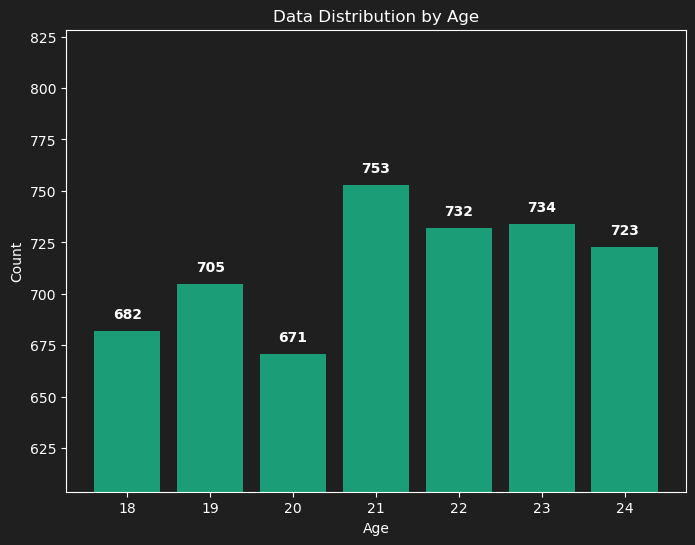

In [31]:
# Create a figure and a single set of axes with specified size
fig, ax = plt.subplots(figsize=(8, 6))

# Calculate the counts of each age and reindex to include all ages from 18 to 24
age_counts = df['Age'].value_counts().reindex([18,19,20,21,22,23,24])

# Plot a bar chart with age on the x-axis and counts on the y-axis
ax.bar(age_counts.index, age_counts.values, color=palette[0])

# Set x-axis ticks to show all ages from 18 to 24
ax.set_xticks(age_counts.index)

# Set title and labels for the axes
ax.set_title('Data Distribution by Age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

# Customize the appearance of the graph
customize_graph(ax, plot_type='bar')

# Show the plot
plt.show()


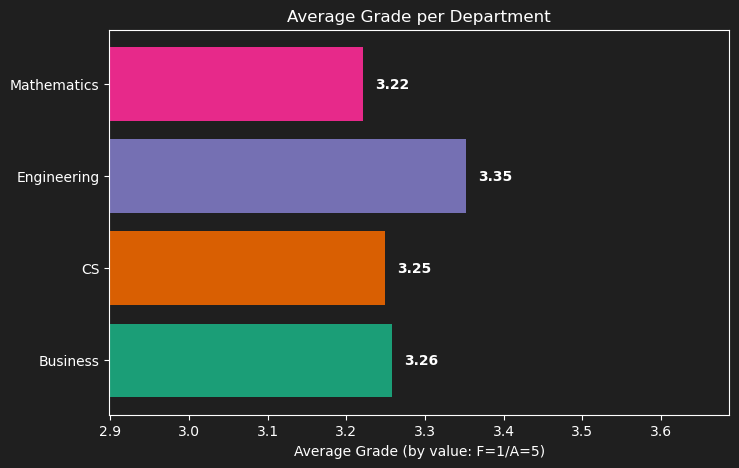

In [32]:
# Create a DataFrame for average score values by department
average_scores = df.groupby('Department')['grade_int'].mean().reset_index()

# Create a figure with specified size
plt.figure(figsize=(8, 5))

# Plot a horizontal bar chart for average grades per department
bars = plt.barh(average_scores['Department'], average_scores['grade_int'], color=palette)

plt.xlabel('Average Grade (by value: F=1/A=5)')
plt.title('Average Grade per Department')

# Customize the appearance of the graph
customize_graph(plt.gca(), plot_type='barh')

# Show the plot
plt.show()




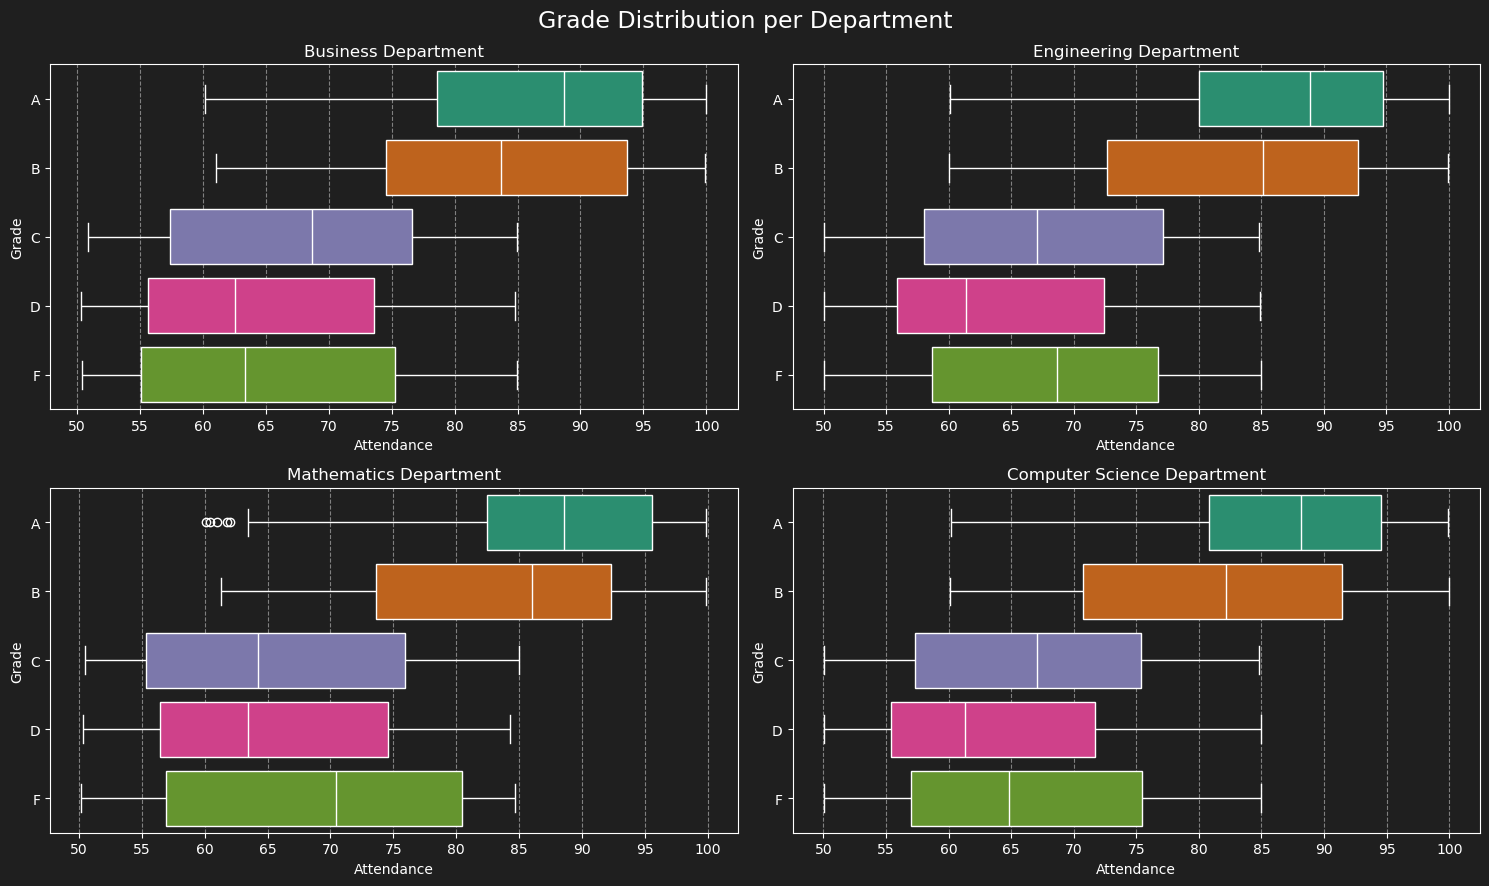

In [33]:
# Sort each department DataFrame by 'Grade'
biz_asc = biz_df.sort_values(by='Grade')
engi_asc = engi_df.sort_values(by='Grade')
math_asc = math_df.sort_values(by='Grade')
cs_asc = cs_df.sort_values(by='Grade')

# Set a color palette for the plots
palette1 = sns.color_palette("Dark2", n_colors=5)

# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 9))

# Create a boxplot for the Business Department
sns.boxplot(x='Attendance (%)', y='Grade', hue='Grade', data=biz_asc, ax=axs[0, 0], 
            orient='h', palette=palette1, linecolor='white')
axs[0, 0].set_title('Business Department')
axs[0, 0].set_xlabel('Attendance')
axs[0, 0].set_ylabel('Grade')
customize_graph(axs[0, 0], plot_type='boxplot')  # Customize the appearance of the boxplot

# Create a boxplot for the Engineering Department
sns.boxplot(x='Attendance (%)', y='Grade', hue='Grade', data=engi_asc, ax=axs[0, 1], 
            orient='h', palette=palette1, linecolor='white')
axs[0, 1].set_title('Engineering Department')
axs[0, 1].set_xlabel('Attendance')
axs[0, 1].set_ylabel('Grade')
customize_graph(axs[0, 1], plot_type='boxplot')  # Customize the appearance of the boxplot

# Create a boxplot for the Mathematics Department
sns.boxplot(x='Attendance (%)', y='Grade', hue='Grade', data=math_asc, ax=axs[1, 0], 
            orient='h', palette=palette1, linecolor='white')
axs[1, 0].set_title('Mathematics Department')
axs[1, 0].set_xlabel('Attendance')
axs[1, 0].set_ylabel('Grade')
customize_graph(axs[1, 0], plot_type='boxplot')  # Customize the appearance of the boxplot

# Create a boxplot for the Computer Science Department
sns.boxplot(x='Attendance (%)', y='Grade', hue='Grade', data=cs_asc, ax=axs[1, 1], 
            orient='h', palette=palette1, linecolor='white')
axs[1, 1].set_title('Computer Science Department')
axs[1, 1].set_xlabel('Attendance')
axs[1, 1].set_ylabel('Grade')
customize_graph(axs[1, 1], plot_type='boxplot')  # Customize the appearance of the boxplot

# Loop over all axes in the grid
for ax in axs.flat:
    # Set x-axis ticks from 50 to 100 with a step of 5
    ax.set_xticks(range(50, 101, 5))
    # Add grid lines along the x-axis with dashed grey lines
    ax.grid(True, axis='x', linestyle='--', color='grey')

# Set a super title for the entire figure
plt.suptitle('Grade Distribution per Department', color='white', fontsize=17)
# Adjust the layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()


### Family Income and Education:
- Does parent education level affect the academic performance of students?
- Are students with parents who have higher education levels more likely to achieve better grades? Family Income Level and Academic Performance:
- Does family income level have an impact on students' grades and total scores?
- How does family income level influence students' access to educational resources and study habits?

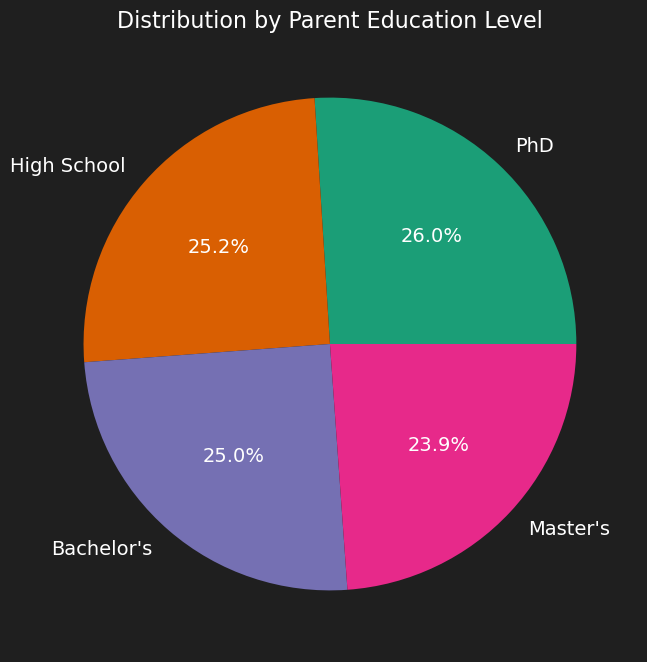

<Figure size 800x800 with 0 Axes>

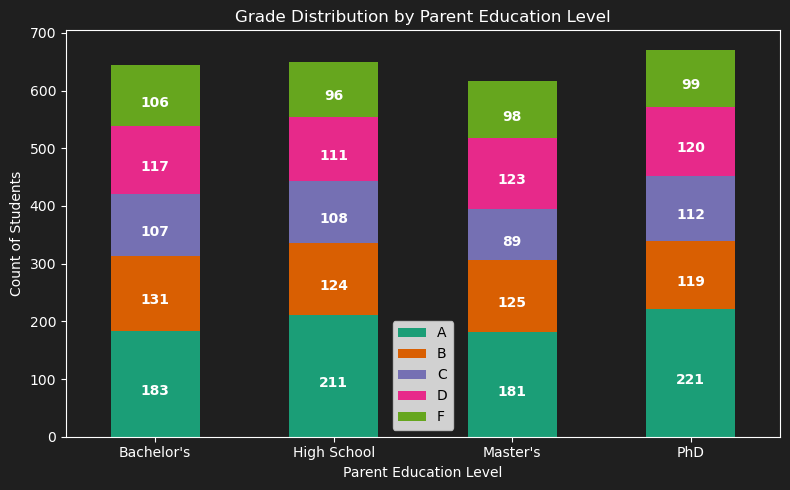

In [34]:
# Drop rows with any missing values in the DataFrame
parent_df = df.dropna()

#Creating DFs
grade_counts = parent_df.groupby(['Parent_Education_Level', 'Grade']).size().unstack(fill_value=0)
edu_levels = ['High School',"Bachelor's","Master's",'PhD']
family_edu_counts = parent_df['Parent_Education_Level'].value_counts()

# Create a figure and an axes for the pie chart 
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(family_edu_counts, labels=family_edu_counts.index, autopct='%1.1f%%', colors=palette, textprops={'color': 'white', 'fontsize': 14})
ax.set_title('Distribution by Parent Education Level', fontsize=16)
customize_graph(ax, plot_type='pie')
plt.show()

# Create a figure for the bar chart
plt.figure(figsize=(8, 8))
ax = grade_counts.plot(kind='bar', stacked=True, figsize=(8, 5), legend=False, color=palette)
plt.title('Grade Distribution by Parent Education Level')
plt.xlabel('Parent Education Level')
plt.ylabel('Count of Students')
plt.xticks(rotation=0)
plt.tight_layout()
customize_graph(ax, plot_type='bari')

# Add text labels to each bar showing the height (count of students)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.text(x + width / 2, y + height/2, f'{int(height)}', ha='center', va='top', color='white', fontweight='bold')

plt.legend()
plt.show()





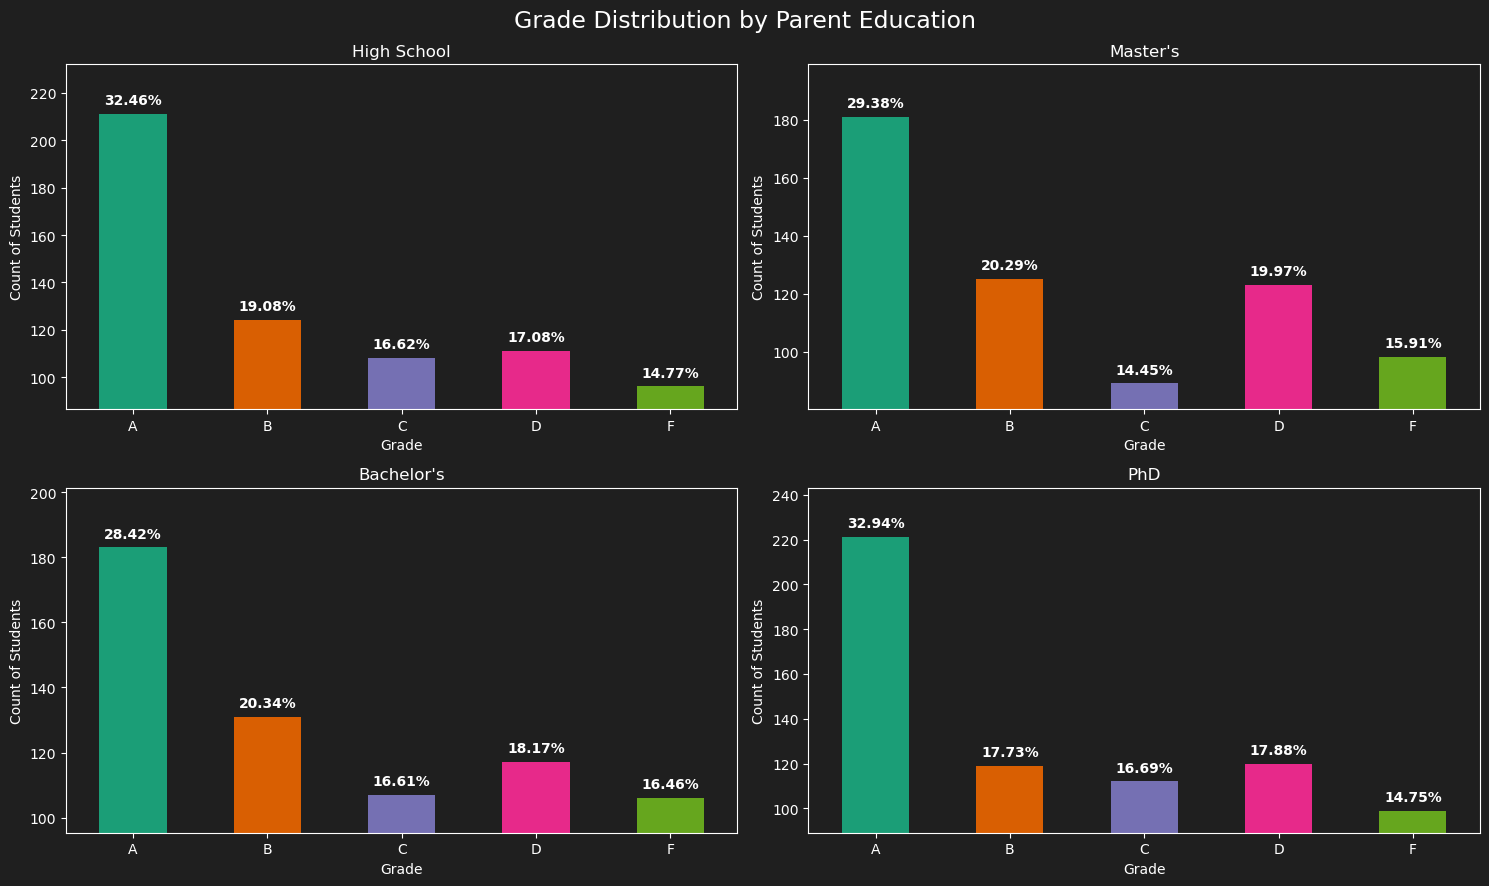

In [35]:
# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 9))

# Flatten the array of axes for easy iteration
axs = axs.flatten()
# Get the unique parent education levels
education_levels = parent_df['Parent_Education_Level'].unique()

# Loop over each education level to create a plot for each
for i, education_level in enumerate(education_levels):
    ax = axs[i]  # Select the subplot
    # Subset the DataFrame for the current education level
    subset = parent_df[parent_df['Parent_Education_Level'] == education_level]
    # Get the grade distribution for the subset and sort the index
    grade_distribution = subset['Grade'].value_counts().sort_index()
    
    # Plot a bar chart for the grade distribution
    grade_distribution.plot(kind='bar', ax=ax, color=palette) 
    ax.set_title(education_level)  # Set the title of the subplot
    ax.set_xlabel('Grade')  # Set the x-axis label
    ax.set_ylabel('Count of Students')  # Set the y-axis label
    ax.tick_params(axis='x', rotation=0)  # Rotate x-axis labels to be horizontal
    # Customize the appearance of the plot
    customize_graph_percentage(ax, plot_type='bar')

# Set a super title for the entire figure
plt.suptitle('Grade Distribution by Parent Education', color='white', fontsize=17)
# Adjust the layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()



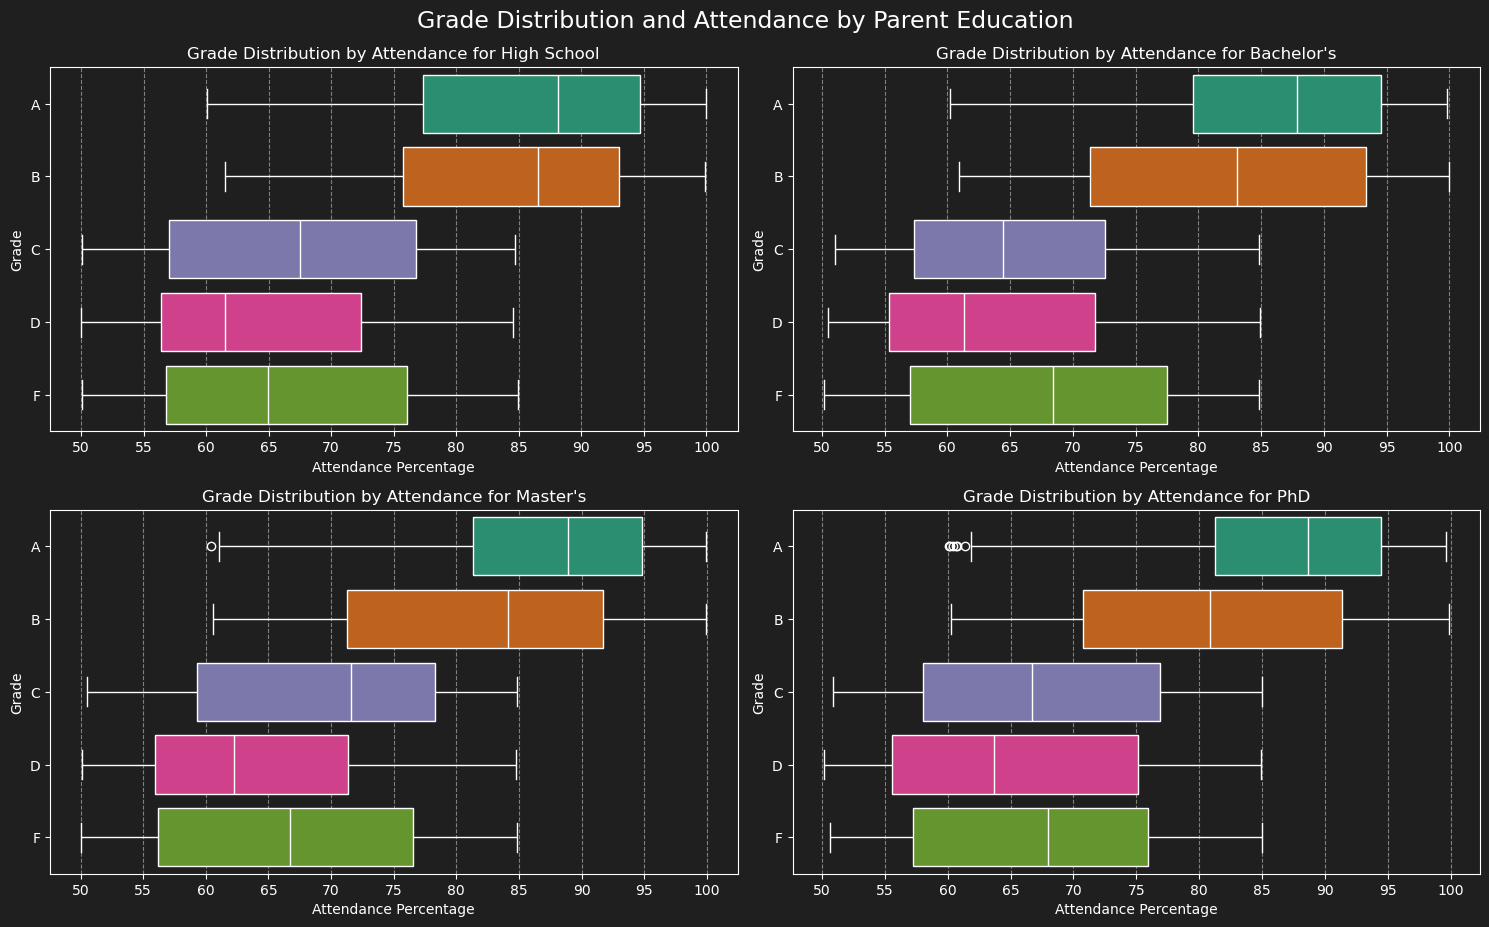

In [36]:
# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 9))

# Define the order of grades for consistent plotting
grade_order = ['A', 'B', 'C', 'D', 'F']
# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Define the order of parent education levels
education_levels = ['High School', "Bachelor's", "Master's", 'PhD']

# Loop over each education level to create a plot for each
for i, education_level in enumerate(education_levels):
    ax = axs[i]  # Select the subplot
    # Subset the DataFrame for the current education level
    subset = df[df['Parent_Education_Level'] == education_level]

    # Create a boxplot for grade distribution by attendance percentage
    sns.boxplot(x='Attendance (%)', y='Grade', hue='Grade', data=subset, ax=ax, orient='h', 
                palette=palette1, linecolor='white', order=grade_order, hue_order=grade_order)

    # Set the title and labels for the subplot
    ax.set_title(f'Grade Distribution by Attendance for {education_level}')
    ax.set_xlabel('Attendance Percentage')
    ax.set_ylabel('Grade')

    # Customize the appearance of the plot
    customize_graph(ax, plot_type='boxplot')

# Loop over all axes in the grid
for ax in axs.flat:
    # Set x-axis ticks from 50 to 100 with a step of 5
    ax.set_xticks(range(50, 101, 5))
    # Add grid lines along the x-axis with dashed grey lines
    ax.grid(True, axis='x', linestyle='--', color='grey')

# Adjust the layout to prevent overlap
plt.tight_layout()
# Set a super title for the entire figure
plt.suptitle('Grade Distribution and Attendance by Parent Education', color='white', fontsize=17, y=1.025)
# Show the plot
plt.show()


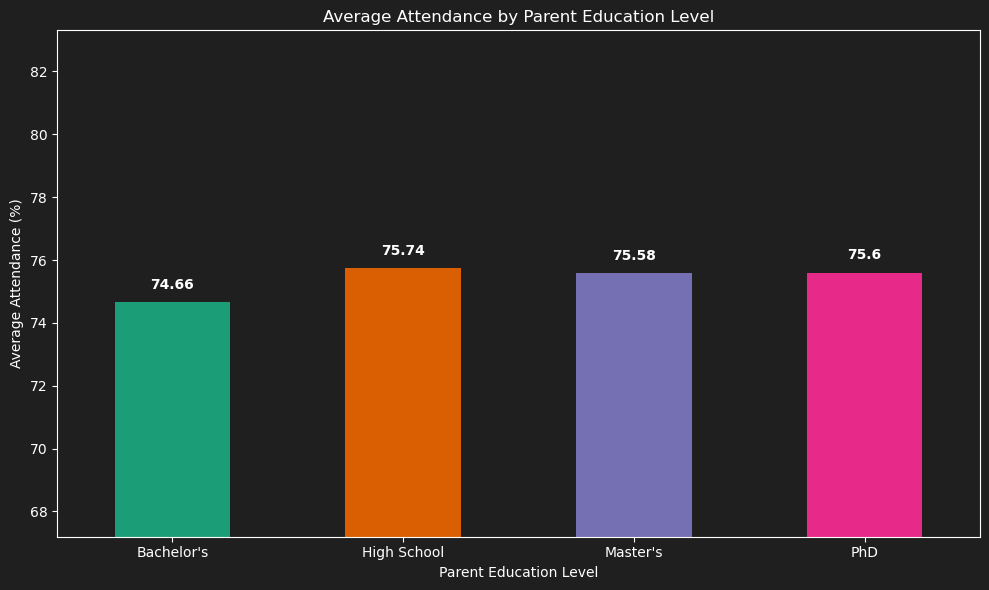

In [37]:
# Calculate the average attendance percentage for each parent education level
avg_attendance = df.groupby('Parent_Education_Level')['Attendance (%)'].mean()

# Create a figure with specified size
plt.figure(figsize=(10, 6))
# Plot a bar chart for average attendance by parent education level
ax = avg_attendance.plot(kind='bar', color=palette)
# Set the title and labels for the plot
plt.title('Average Attendance by Parent Education Level')
plt.xlabel('Parent Education Level')
plt.ylabel('Average Attendance (%)')
# Rotate x-axis labels to be horizontal
plt.xticks(rotation=0)
plt.tight_layout()

# Customize the appearance of the bar chart
customize_graph(ax, plot_type='bar')

# Show the plot
plt.show()



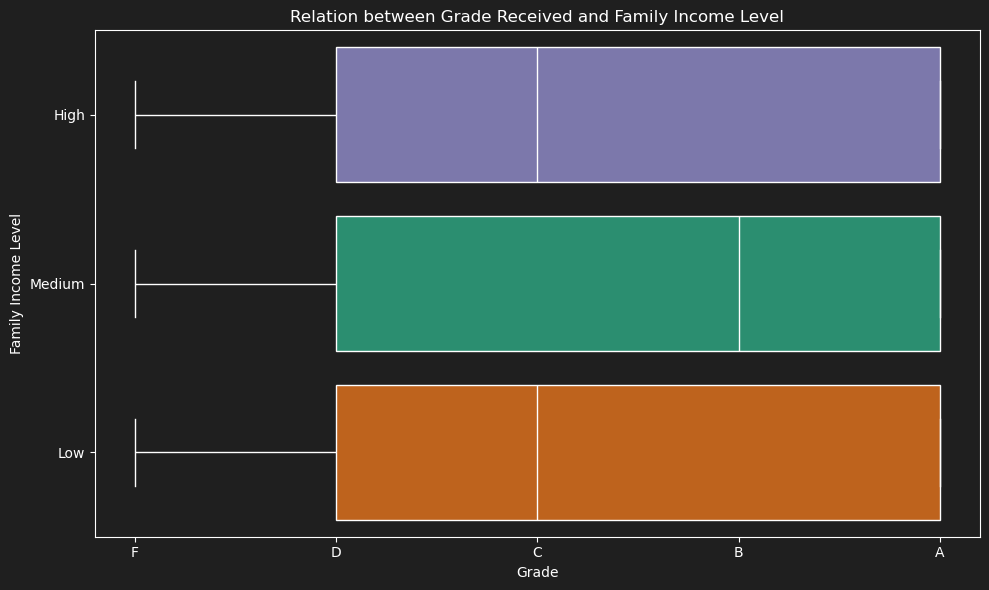

In [38]:
plt.figure(figsize=(10, 6))

# Define a color palette for the plot
palette2 = sns.color_palette("Dark2", n_colors=3)
# Define the labels for grades and order for income levels
grade_labels = ['F', 'D', 'C', 'B', 'A']
income_order = ['High', 'Medium', 'Low']

# Create a boxplot for the relation between grade received and family income level
sns.boxplot(x='grade_int', y='Family_Income_Level', hue='Family_Income_Level', data=df, palette=palette2, 
            orient='h', linecolor='white', order=income_order)
# Set the title and labels for the plot
plt.title('Relation between Grade Received and Family Income Level')
plt.xlabel('Grade')
plt.ylabel('Family Income Level')
plt.tight_layout()

# Customize the appearance of the plot
customize_graph(plt.gca(), plot_type='box')

# Set custom labels for the x-axis ticks
plt.xticks(ticks=range(1,6), labels=grade_labels)
# Show the plot
plt.show()



C:\Users\ttzen\AppData\Local\Temp\ipykernel_19804\428467111.py:11: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.boxplot(x='Study_Hours_per_Week', y='Parent_Education_Level', hue='Parent_Education_Level', data=df, order=edu_levels, palette=palette, orient='h', ax=axs[0], linecolor='white', legend=False)


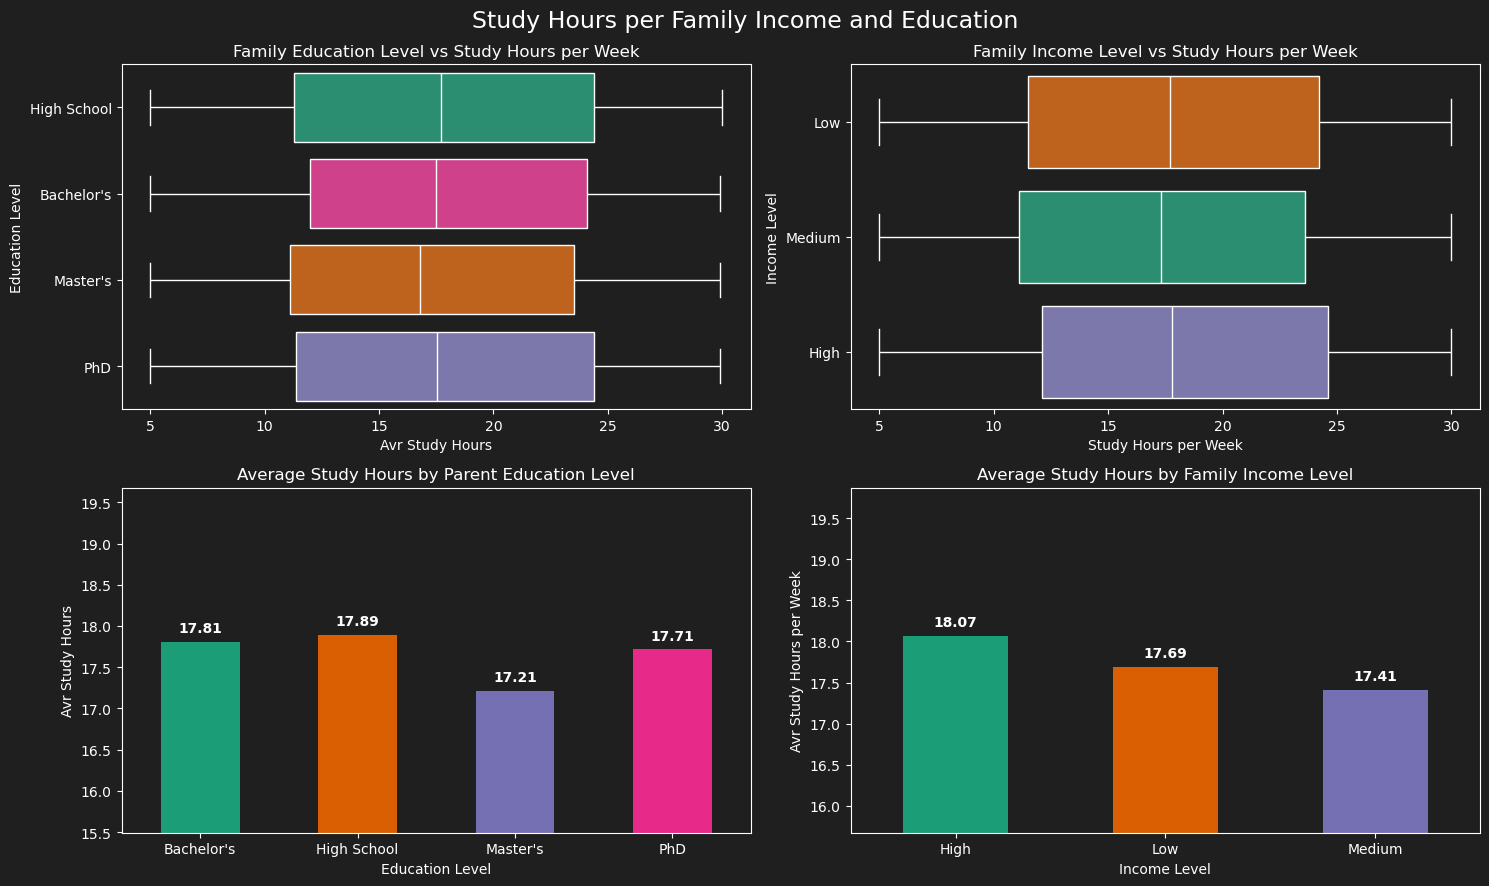

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(15, 9))

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Plot the horizontal box plot for Parent Education Level vs Study Hours per Week
sns.boxplot(x='Study_Hours_per_Week', y='Parent_Education_Level', hue='Parent_Education_Level', data=df, order=edu_levels, palette=palette, orient='h', ax=axs[0], linecolor='white', legend=False)
axs[0].set_title('Family Education Level vs Study Hours per Week')
axs[0].set_xlabel('Avr Study Hours')
axs[0].set_ylabel('Education Level')
customize_graph(axs[0], plot_type='box')

income_order = ['Low', 'Medium', 'High']
# Plot the horizontal box plot for Family Income Level vs Study Hours per Week
sns.boxplot(x='Study_Hours_per_Week', y='Family_Income_Level', hue='Family_Income_Level', order=income_order, data=df, palette=palette2, orient='h', ax=axs[1], linecolor='white')
axs[1].set_title('Family Income Level vs Study Hours per Week')
axs[1].set_xlabel('Study Hours per Week')
axs[1].set_ylabel('Income Level')
customize_graph(axs[1], plot_type='box')

# Calculate the average study hours for Parent Education Level
avg_study_hours_edu = df.groupby('Parent_Education_Level')['Study_Hours_per_Week'].mean()

# Plot the bar chart for average study hours by Parent Education Level
avg_study_hours_edu.plot(kind='bar', ax=axs[2], color=palette)
axs[2].set_title('Average Study Hours by Parent Education Level')
axs[2].set_xlabel('Education Level')
axs[2].set_ylabel('Avr Study Hours')
axs[2].tick_params(axis='x', rotation=0)

# edu_levels = ['High School',"Bachelor's","Master's",'PhD']
# axs[2].set_xticks(ticks=range(0,4), labels=edu_levels)

customize_graph(axs[2], plot_type='bar')

# Calculate the average study hours for Family Income Level
avg_study_hours_income = df.groupby('Family_Income_Level')['Study_Hours_per_Week'].mean()

# Plot the bar chart for average study hours by Family Income Level
avg_study_hours_income.plot(kind='bar', ax=axs[3], color=palette)
axs[3].set_title('Average Study Hours by Family Income Level')
axs[3].set_xlabel('Income Level')
axs[3].set_ylabel('Avr Study Hours per Week')
axs[3].tick_params(axis='x', rotation=0)

# income_order = ['Low', 'Medium', 'High']
# axs[3].set_xticks(ticks=range(0,3), labels=income_order)

customize_graph(axs[3], plot_type='bar')

plt.suptitle('Study Hours per Family Income and Education', color='white', fontsize=17)
plt.tight_layout()
plt.show()


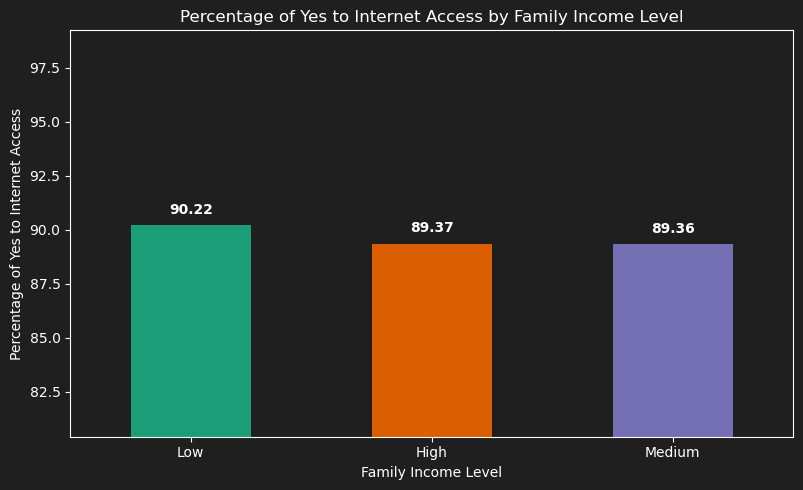

In [40]:

internet_access_counts = pd.crosstab(df['Family_Income_Level'], df['Internet_Access_at_Home'])

internet_access_percent = (internet_access_counts['Yes'] / internet_access_counts.sum(axis=1)) * 100

internet_access_percent_sorted = internet_access_percent.sort_values(ascending=False)

# Plot the bar graph
plt.figure(figsize=(8, 5))
internet_access_percent_sorted.plot(kind='bar', color=palette)
plt.title('Percentage of Yes to Internet Access by Family Income Level')
plt.xlabel('Family Income Level')
plt.ylabel('Percentage of Yes to Internet Access')
plt.xticks(rotation=0)
plt.tight_layout()

# Customize the graph (optional)
customize_graph(plt.gca(), plot_type='bar')

# Display the plot
plt.show()


## LIFESTYLE
### Impact of Study Habits:
Is there a relationship between study hours per week and the total score of students?
How do study habits influence students' grades and overall performance?
Extracurricular Activities and Academic Performance:
- Do students involved in extracurricular activities have higher or lower academic performance compared to those who are not involved?
- What is the impact of extracurricular participation on students' stress levels?
Stress and Sleep Patterns:
- Is there a correlation between students' stress levels and their sleep hours per night?
- How do stress levels affect students' academic performance and attendance?

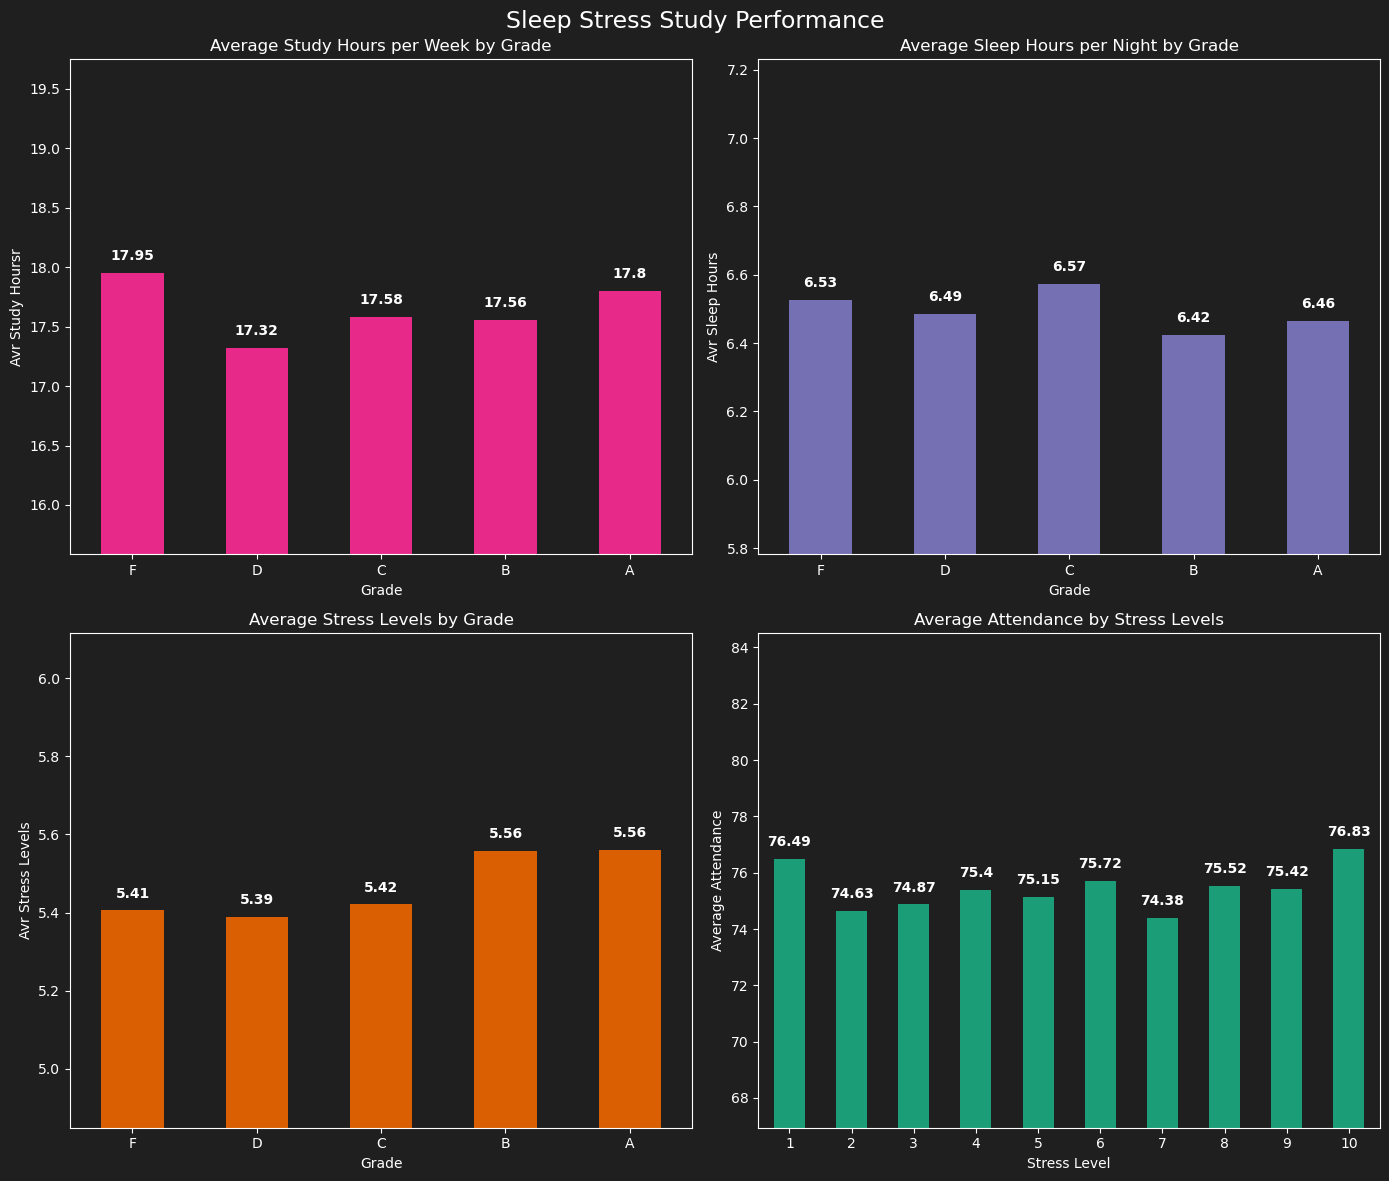

In [41]:
# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Plot for average study hours per week by grade
avg_study_hours = df.groupby('grade_int')['Study_Hours_per_Week'].mean()
avg_study_hours.plot(kind='bar', ax=axs[0, 0], color=palette[3])
axs[0, 0].set_title('Average Study Hours per Week by Grade')
axs[0, 0].set_xlabel('Grade')
axs[0, 0].set_ylabel('Avr Study Hoursr')
axs[0, 0].tick_params(axis='x', rotation=0)
axs[0, 0].set_xticklabels(['F', 'D', 'C', 'B', 'A'])
customize_graph(axs[0, 0], plot_type='bar')

# Plot for average sleep hours per night by grade
avg_sleep_hours = df.groupby('grade_int')['Sleep_Hours_per_Night'].mean()
avg_sleep_hours.plot(kind='bar', ax=axs[0, 1], color=palette[2])
axs[0, 1].set_title('Average Sleep Hours per Night by Grade')
axs[0, 1].set_xlabel('Grade')
axs[0, 1].set_ylabel('Avr Sleep Hours')
axs[0, 1].tick_params(axis='x', rotation=0)
axs[0, 1].set_xticklabels(['F', 'D', 'C', 'B', 'A'])
customize_graph(axs[0, 1], plot_type='bar')

# Plot for average stress levels by grade
avg_stress_levels = df.groupby('grade_int')['Stress_Level (1-10)'].mean()
avg_stress_levels.plot(kind='bar', ax=axs[1, 0], color=palette[1])
axs[1, 0].set_title('Average Stress Levels by Grade')
axs[1, 0].set_xlabel('Grade')
axs[1, 0].set_ylabel('Avr Stress Levels')
axs[1, 0].tick_params(axis='x', rotation=0)
axs[1, 0].set_xticklabels(['F', 'D', 'C', 'B', 'A'])
customize_graph(axs[1, 0], plot_type='bar')

# Plot for average attendance by stress levels
avg_attendance = df.groupby('Stress_Level (1-10)')['Attendance (%)'].mean()
avg_attendance.plot(kind='bar', ax=axs[1, 1], color=palette[0])
axs[1, 1].set_title('Average Attendance by Stress Levels')
axs[1, 1].set_xlabel('Stress Level')
axs[1, 1].set_ylabel('Average Attendance')
axs[1, 1].tick_params(axis='x', rotation=0)
customize_graph(axs[1, 1], plot_type='bar')

# Set a super title for the entire figure
plt.suptitle('Sleep Stress Study Performance', color='white', fontsize=17)
# Adjust the layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()


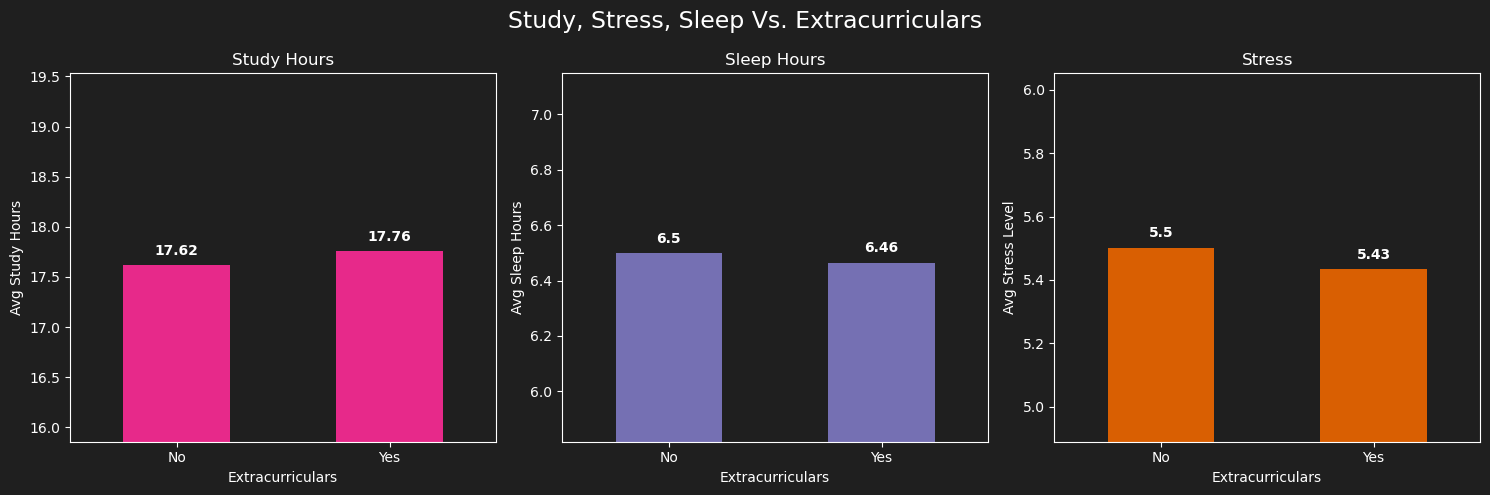

In [42]:
# Set up the figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
edu_df = df
# Average Study Hours per Week by Extracurricular Activities
avg_study_hours_extra = edu_df.groupby('Extracurricular_Activities')['Study_Hours_per_Week'].mean()
avg_study_hours_extra.plot(kind='bar', ax=axs[0], color=palette[3])
axs[0].set_title('Study Hours')
axs[0].set_xlabel('Extracurriculars')
axs[0].set_ylabel('Avg Study Hours')
axs[0].tick_params(axis='x', rotation=0)
customize_graph(ax=axs[0], plot_type='bar')

# Average Sleep Hours per Night by Extracurricular Activities
avg_sleep_hours_extra = edu_df.groupby('Extracurricular_Activities')['Sleep_Hours_per_Night'].mean()
avg_sleep_hours_extra.plot(kind='bar', ax=axs[1], color=palette[2])
axs[1].set_title('Sleep Hours')
axs[1].set_xlabel('Extracurriculars')
axs[1].set_ylabel('Avg Sleep Hours')
axs[1].tick_params(axis='x', rotation=0)
customize_graph(ax=axs[1], plot_type='bar')

# Average Stress Level by Extracurricular Activities
avg_stress_level_extra = edu_df.groupby('Extracurricular_Activities')['Stress_Level (1-10)'].mean()
avg_stress_level_extra.plot(kind='bar', ax=axs[2], color=palette[1])
axs[2].set_title('Stress')
axs[2].set_xlabel('Extracurriculars')
axs[2].set_ylabel('Avg Stress Level')
axs[2].tick_params(axis='x', rotation=0)
customize_graph(ax=axs[2], plot_type='bar')

plt.suptitle('Study, Stress, Sleep Vs. Extracurriculars', color='w', fontsize=17)
plt.tight_layout()
plt.show()



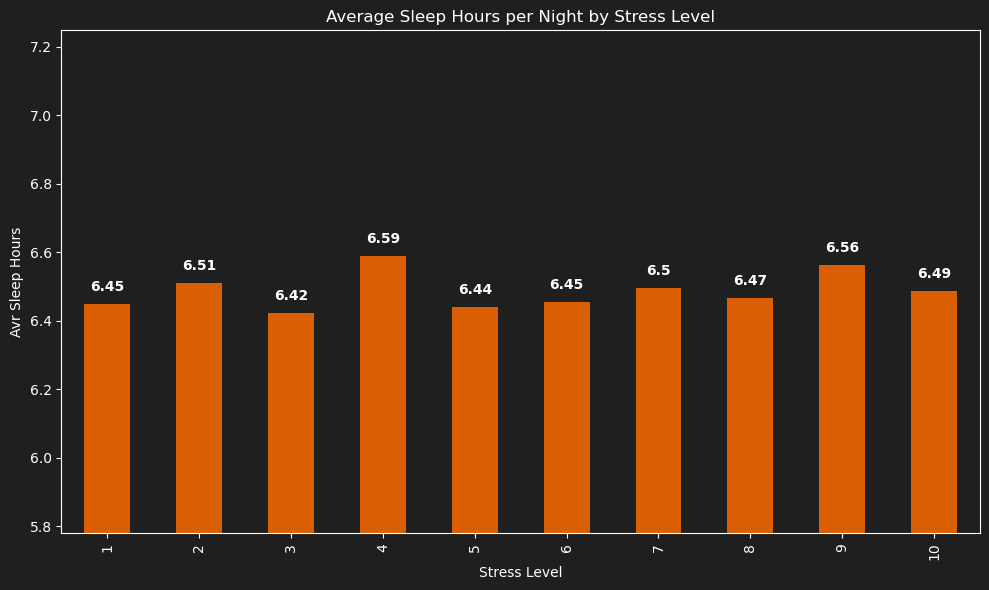

In [43]:
# Calculate the average sleep hours per night by stress level
avg_sleep_hours_stress = edu_df.groupby('Stress_Level (1-10)')['Sleep_Hours_per_Night'].mean()

# Plot the bar graph
plt.figure(figsize=(10, 6))
avg_sleep_hours_stress.plot(kind='bar', color=palette[1])
plt.title('Average Sleep Hours per Night by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Avr Sleep Hours')
customize_graph(plt.gca())
plt.tight_layout()
plt.show()



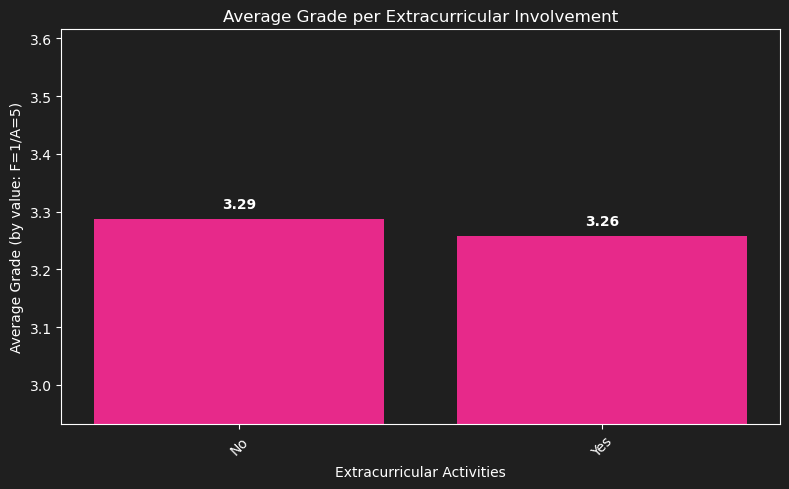

In [44]:
# Calculate the average grade per extracurricular involvement
avg_grade_extra = df.groupby('Extracurricular_Activities')['grade_int'].mean().reset_index()

# Plot the bar graph
plt.figure(figsize=(8, 5))
bars = plt.bar(avg_grade_extra['Extracurricular_Activities'], avg_grade_extra['grade_int'], color=palette[3])
plt.xlabel('Extracurricular Activities')
plt.ylabel('Average Grade (by value: F=1/A=5)')
plt.title('Average Grade per Extracurricular Involvement')
plt.xticks(rotation=45)
customize_graph(plt.gca())

plt.tight_layout()
plt.show()


C:\Users\ttzen\AppData\Local\Temp\ipykernel_19804\1064405253.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_grade_per_bin = df.groupby('Attendance_Bin')['grade_int'].mean().reset_index()


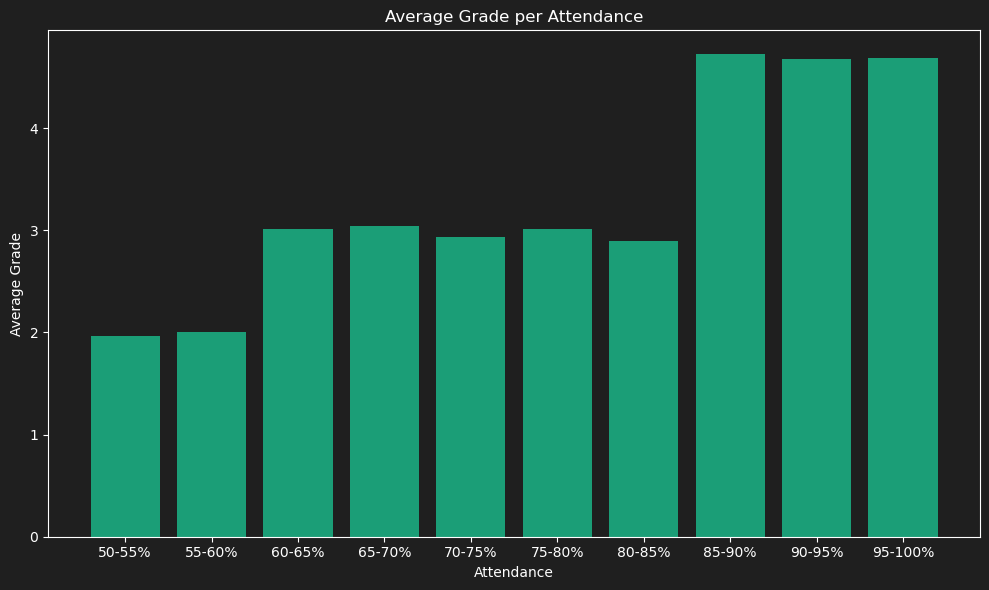

In [47]:
attendance_bins = np.arange(0, 105, 5)
df['Attendance_Bin'] = pd.cut(df['Attendance (%)'], bins=attendance_bins)

# Calculate average grade_int within each bin
avg_grade_per_bin = df.groupby('Attendance_Bin')['grade_int'].mean().reset_index()

# Create a list of formatted bin labels
bin_labels = [f'{int(bin.left)}-{int(bin.right)}%' for bin in avg_grade_per_bin['Attendance_Bin']]

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(bin_labels, avg_grade_per_bin['grade_int'], color=palette[0])
plt.xlabel('Attendance')
plt.ylabel('Average Grade')
plt.title('Average Grade per Attendance')
plt.xticks(rotation=0)

customize_graph(plt.gca(), plot_type='bari')

plt.tight_layout()
plt.show()
